In [8]:
import os
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

Matplotlib is building the font cache; this may take a moment.


In [38]:
api = KaggleApi()
api.authenticate()

In [40]:
output_dir = "./dataset"
os.makedirs(output_dir, exist_ok=True)

In [41]:
api.dataset_download_files("mlg-ulb/creditcardfraud", path=output_dir, unzip=True)
print(f"Dataset downloaded to: {output_dir}")

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Dataset downloaded to: ./dataset


In [33]:
df = pd.read_csv(r"./dataset/creditcard.csv")
df.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The numerical features in this Dataset are the result of a PCA transformation and have been obscured for security reasons. This means that each of the features from V1-V28 essentially represents a principle component from the original dataset.

Genuine transactions: 284315
Fraud transactions: 492


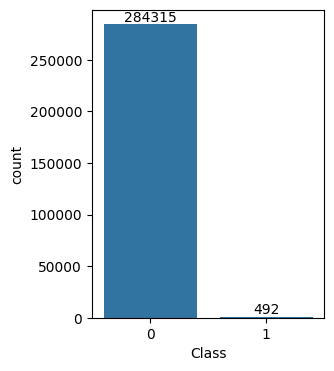

In [ ]:
# First, we want to view the distribution of genuine and fraudulent transactions
# across the dataset.

class_dist = df['Class'].value_counts()

print(f"Genuine transactions: {class_dist[0]}")
print(f"Fraud transactions: {class_dist[1]}")

plt.figure(figsize=(3,4))
countplot = sns.countplot(data=df, x='Class')

for container in countplot.containers:
    countplot.bar_label(container, )


Class
0    284315
1       492
Name: count, dtype: int64


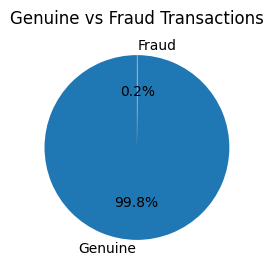

In [ ]:
# Next, we can view what percentage of the transactions in the dataset are actually fraudulent

labels = ['Genuine', 'Fraud']

plt.figure(figsize=(3, 3))
plt.pie(df['Class'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Genuine vs Fraud Transactions')
plt.show()

As we can see, our dataset is highly imbalanced, with most transactions being genuine. This could make it difficult for our fraud detection model to accurately identify fraudulant transactions.

Imbalanced datasets can skew the model's decision boundary towards the minority class, making it more likely that the model will label a transaction is Genuine - even if this may not be the case.